In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 
import sys

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
sys.path.append("/home/rocassius/w266_final/scripts/assembly")
sys.path.append("/home/rocassius/w266_final/scripts/modeling")

In [8]:
from constant import MIN_SESSION, MAX_SESSION

In [10]:
from document import *
from helper import *
from rmn import *
from rmn_analyzer import *

In [11]:
# load embedding tools
generic_tools_path = "/home/rocassius/gen-data/tools/generic_tools"
prayer_tools_path = "/home/rocassius/gen-data/tools/prayer_tools"

global_embedding_matrix = load_pickled_object(os.path.join(prayer_tools_path, "embedding_matrix_wg"))
global_tokenizer_dict = load_pickled_object(os.path.join(prayer_tools_path, "tokenizer_dict_wg"))

In [12]:
# load rmn
local_models_path = "/home/rocassius/gen-data/models"
rmn = RigidRMN()
rmn.load_rmn("PoliteFinish", local_models_path)
rmn.infer_embedding_matrix = global_embedding_matrix
rmn.infer_tokenizer_dict = global_tokenizer_dict

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
# load data
topic_data_path = "/home/rocassius/gen-data/data/topic-data-first/" 
data = load_pickled_object(os.path.join(topic_data_path, "topic_data_all.pkl"))

In [14]:
data[0].keys()

dict_keys(['dataset', 'topics', 'session'])

In [15]:
data[0]['dataset'].keys()

dict_keys(['n_records', 'n_records_R', 'n_records_D', 'n_nan_preds_R', 'n_nan_preds_D', 'hh', 'hh_R', 'hh_D', 'js_RD', 'js_placebo', 'topic_use', 'topic_use_R', 'topic_use_D'])

Records Data

In [16]:
total_records = np.array([d['dataset']['n_records'] for d in data]).sum()
total_records

3913325

In [17]:
R_records = np.array([d['dataset']['n_records_R'] for d in data]).sum()
R_records

1697124

In [18]:
D_records = np.array([d['dataset']['n_records_D'] for d in data]).sum()
D_records

2175473

In [20]:
sessions = np.array([d['session'] for d in data])

In [21]:
js = [d['dataset']['js_RD'] for d in data]

In [22]:
js_placebo = [d['dataset']['js_placebo']['mean'] for d in data] 

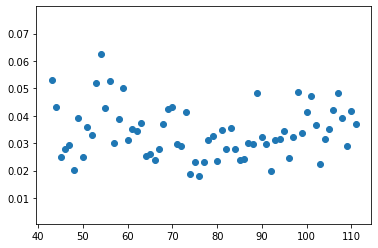

In [23]:
plt.scatter(sessions, js)
plt.show()

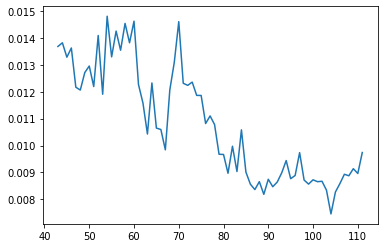

In [55]:
plt.plot(sessions, js_placebo)
plt.show()

In [25]:
js_diff = np.array(js) - np.array(js_placebo)

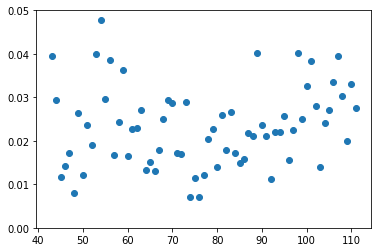

In [26]:
# success in detecting overall divergence !
plt.scatter(sessions, js_diff)
plt.ylim((0.000, 0.05))
plt.show()

In [132]:
session_index = dict(zip(sessions, range(len(sessions))))
index_session = {i:s for s,i in session_index.items()} 

In [150]:
[2,3,4,5][-1]

5

In [192]:
def print_topic_windows(t, data, min_rec=200):
    
    sess_dict = {s:data[session_index[s]]['topics'][t] for s in sessions}
    relevant_sessions = [s for s in sessions if 
                         sess_dict[s]['n_records_R'] >= min_rec and 
                         sess_dict[s]['n_records_D'] >= min_rec] 
    
    nums = relevant_sessions
    ranges = sum((list(t) for t in zip(nums, nums[1:]) if t[0]+1 != t[1]), [])
    iranges = iter(nums[0:1] + ranges + nums[-1:])
    print(', '.join([str(n) + '-' + str(next(iranges)) for n in iranges]))

In [193]:
print_topic_windows(2, data, min_rec = 100)

43-57, 61-63, 65-65, 67-69, 71-73, 78-78, 80-81, 83-111


In [205]:
np.arange(3,90)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89])

In [252]:
def plot_js_topic(t, data, min_sess,  max_sess):
    
    js_RD = [d['topics'][t]['js_RD'] for d in data]
    js_placebo = [d['topics'][t]['js_placebo']['mean'] for d in data]
    
    index = range(session_index[min_sess], session_index[max_sess]+1)
    js_RD = np.array(js_RD)[index]
    js_placebo = np.array(js_placebo)[index]
    
    js_true = js_RD - js_placebo
    
    plt.scatter(range(min_sess, max_sess+1), js_true)
    plt.show()
    

### Health and insurance

In [253]:
print_topic_windows(99, data, min_rec=200)

87-111


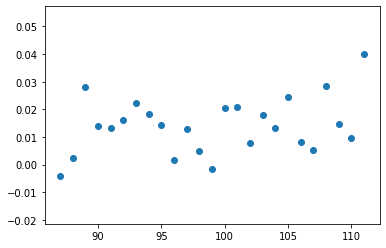

In [254]:
plot_js_topic(99, data, 87, 111)

### Cancer and Disease

In [255]:
print_topic_windows(29, data, min_rec=100)

84-84, 87-111


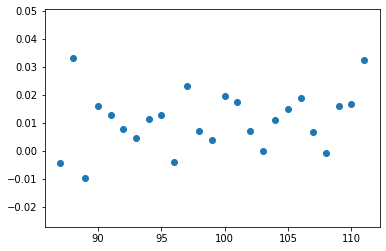

In [256]:
plot_js_topic(29, data, 87, 111)

### Racial Attitudes and Differences

In [257]:
print_topic_windows(31, data, min_rec=100)

47-47, 49-51, 53-53, 55-59, 61-111


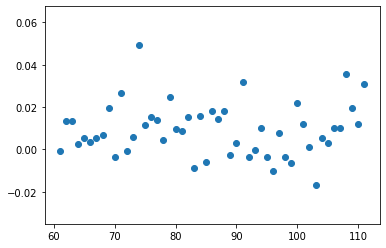

In [258]:
plot_js_topic(31, data, 61, 111)

### Industry and Markets

In [259]:
print_topic_windows(31, data, min_rec=200)

47-47, 50-51, 57-57, 61-67, 69-69, 71-95, 97-97, 99-101, 104-104, 106-107, 110-110


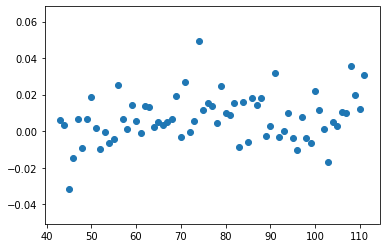

In [260]:
plot_js_topic(31, data, 43, 111)

# Transportation 

In [261]:
print_topic_windows(34, data, min_rec=200)

49-49, 59-59, 61-68, 71-71, 76-76, 78-78, 80-80, 83-110


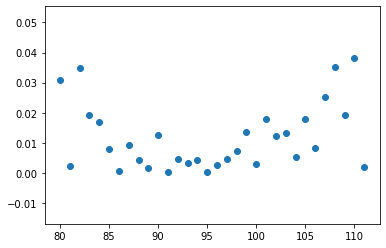

In [262]:
plot_js_topic(34, data, 80, 111)

### Forest and Wildlife

In [263]:
print_topic_windows(41, data, min_rec=200)

63-63, 87-111


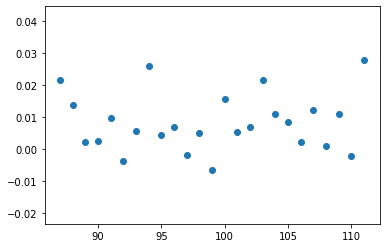

In [264]:
plot_js_topic(41, data, 87, 111)


### Abortion and homosexuality

In [265]:
print_topic_windows(45, data, min_rec=200)

81-81, 83-83, 85-111


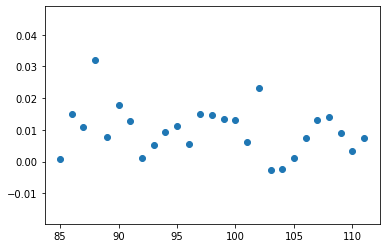

In [266]:
plot_js_topic(45, data, 85, 111)

Determining where there are significant divergences

### Drugs and trafficking

In [267]:
print_topic_windows(51, data, min_rec=200)

89-111


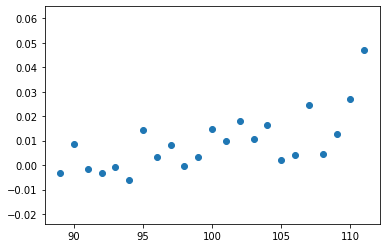

In [269]:
plot_js_topic(51, data, 89, 111)

### Military Corps

In [275]:
print_topic_windows(52, data, min_rec=200)

55-56, 64-67, 72-72, 76-111


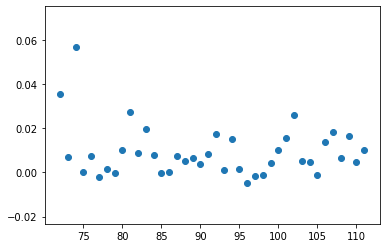

In [276]:
plot_js_topic(52, data, 72, 111)

### Political Parties

In [277]:
print_topic_windows(56, data, min_rec=200)

90-91, 93-111


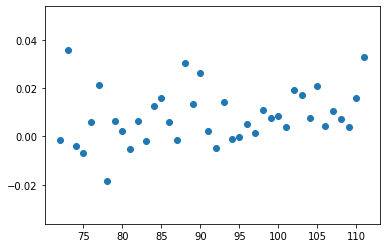

In [278]:
plot_js_topic(56, data, 72, 111)

### Taxes and Income

In [281]:
print_topic_windows(55, data, min_rec=300)

78-78, 87-87, 89-111


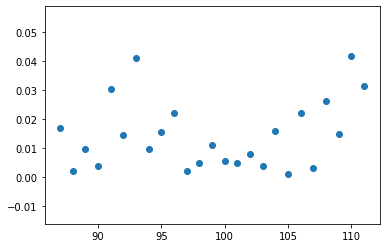

In [282]:
plot_js_topic(55, data, 87, 111)

###  Science

In [283]:
print_topic_windows(65, data, min_rec=300)

86-110


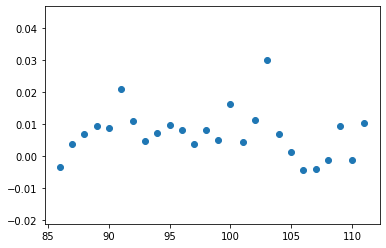

In [284]:
plot_js_topic(65, data, 86, 111)

In [43]:
def analyze_session(s, data):
    d = data[session_index[s]]
    
    js = [{'topic':t,
           'div': v['js_RD'] - v['js_placebo']['mean'], 
           'sig': v['js_RD'] > v['js_placebo']['upper']}
          for t, v in d['topics'].items()]
    
    js_sig = [j for j in js if j['sig']]
    
    return np.array(js_sig)

In [111]:
def session_div_topics(s, data):
    d = data[session_index[s]]
    
    js = [[int(t), 
           round(v['js_RD'] - v['js_placebo']['mean'], 5), 
           v['js_RD'] > v['js_placebo']['upper']]
          for t, v in d['topics'].items()]
    
    order = np.flip(np.argsort(np.array(js)[:,1]))
    sig_order = [i for i in order if js[i][2]]
    
    return sig_order

In [117]:
div_topics = {s: np.array(session_div_topics(s, data))[:20] for s in sessions}

In [118]:
div_topics

{43: array([65, 94, 11, 80, 19, 69, 88,  4, 96,  9, 97, 75, 98, 28, 46, 25, 84,
        17, 36, 67]),
 44: array([58, 72, 21, 55, 78, 10, 51, 86, 22, 83, 25, 32, 59, 13, 18,  7, 60,
        75, 77, 97]),
 45: array([58, 29, 94, 62, 46, 47, 70, 73, 13, 71, 35, 33, 18, 21, 90, 61, 39,
        40, 75, 49]),
 46: array([61, 87, 10, 88, 72,  7, 45, 84, 65, 53, 57, 17, 79,  5, 32, 73, 95,
        37, 62, 48]),
 47: array([94, 72, 56,  1, 61, 17, 33, 45, 28, 35, 86, 97,  6, 51, 24, 34, 82,
        21, 93, 10]),
 48: array([76, 71, 41, 58, 10,  7, 74, 55, 86, 90, 25, 83, 72, 91, 50, 14, 69,
        64, 84,  9]),
 49: array([85, 58, 94, 21, 13, 65, 72,  6, 54, 51, 96, 67, 59, 26, 29, 48, 52,
        62, 40,  7]),
 50: array([43, 13, 65, 32, 76, 88, 17, 78, 30,  5, 35, 44, 29, 83,  7, 58, 31,
        57, 55, 82]),
 51: array([89, 16, 11,  1, 51,  5, 81, 84, 56, 93, 33, 69, 34, 32, 83, 92, 25,
        19, 59, 38]),
 52: array([41, 87, 44, 29,  1,  7, 19, 47, 78, 82, 34, 25, 10, 88, 14, 30, 33,
  

(array([ 1.,  0.,  1.,  1.,  4., 27., 31., 22., 10.,  3.]),
 array([-0.07177333, -0.05843592, -0.04509851, -0.0317611 , -0.01842368,
        -0.00508627,  0.00825114,  0.02158855,  0.03492596,  0.04826337,
         0.06160078]),
 <a list of 10 Patch objects>)

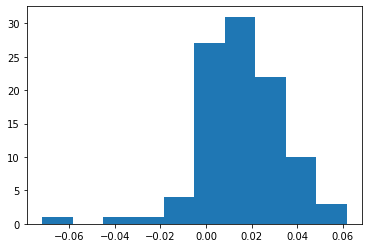

In [150]:
plt.hist(js_111)

# Playing with the model itself

In [36]:
# load embedding tools
prayer_tools_path = "/home/rocassius/gen-data/tools/prayer_tools"
generic_tools_path = "/home/rocassius/gen-data/tools/generic_tools"

global_embedding_matrix = load_pickled_object(os.path.join(prayer_tools_path, "embedding_matrix_wg"))
global_tokenizer_dict = load_pickled_object(os.path.join(prayer_tools_path, "tokenizer_dict_wg"))

In [37]:
RMN_NAME = "PoliteFinish"
RMN_PATH = "/home/rocassius/gen-data/models"

rmn = RigidRMN()
rmn.load_rmn(name=RMN_NAME, save_path=RMN_PATH)
rmn.infer_embedding_matrix = global_embedding_matrix
rmn.infer_tokenizer_dict = global_tokenizer_dict

In [38]:
from constant import DOC_GEN_PATH, DOCUMENT

docs_df = load_pickled_object(os.path.join("/home/rocassius/gen-data/doc/doc-generic/", DOCUMENT % 'sample'))

In [39]:
analyzer = RMN_Analyzer(rmn, docs_df)

In [40]:
analyzer.predict_topics()

In [41]:
analyzer.find_topic_nns()


Topic 0
['applause', 'smile', 'loud', 'cheers', 'laugh', 'shouted', 'shouting', 'joking', 'waved', 'shout']

Topic 1
['improving', 'opportunities', 'integrating', 'improve', 'innovation', 'objectives', 'ensuring', 'goals', 'strategies', 'innovative']

Topic 2
['nomination', 'votes', 'nominees', 'nominations', 'nominee', 'candidates', 'nominated', 'polls', 'vote', 'election']

Topic 3
['examples', 'merely', 'describe', 'instances', 'example', 'abbāsābād', 'mentioned', 'instance', 'simple', 'penchant']

Topic 4
['guys', 'ital', "'re", 'wondering', 'dad', 'maybe', 'somebody', 'kids', 'getting', 'everybody']

Topic 5
['nicaragua', 'salvador', 'fidel', 'castro', 'dictatorship', 'junta', 'marxist', 'leftist', 'nicaraguan', 'regime']

Topic 6
['slap', 'give', 'get', 'lose', 'cut', 'try', 'grab', 'got', 'osgood', 'snap']

Topic 7
['o', 'q', 'l', 'h', 'k', 'n', 'w', 'e', 'p', 'na']

Topic 8
['commenting', 'listens', 'elaborating', 'interviewer', 'candidly', 'talk', 'specifics', 'news', 'listen


Topic 58
['disarmament', 'pyongyang', 'nuclear', 'proliferation', 'nonproliferation', 'progress', 'normalization', 'verifiable', 'diplomatic', 'normalizing']

Topic 59
['arable', 'tracts', 'lands', 'farmland', 'plantations', 'irrigated', 'reclaimed', 'encompassed', 'extensive', 'undeveloped']

Topic 60
['doubtful', 'jehovah', 'abbot', 'regard', 'heretics', 'hades', 'heracles', 'authorship', 'bishopric', 'unwilling']

Topic 61
['inflation', 'unemployment', 'slowdown', 'recession', 'decline', 'growth', 'rate', 'rise', 'slowing', 'gdp']

Topic 62
['river', 'reservoir', 'creek', 'lake', 'dam', 'basin', 'rivers', 'tributaries', 'drains', 'drainage']

Topic 63
['install', 'restaurant', 'rent', 'diners', 'restaurants', 'shop', 'starbucks', 'renting', 'installing', 'buy']

Topic 64
['injunction', 'patent', 'lawsuit', 'plaintiff', 'rulings', 'filed', 'lawsuits', 'supreme', 'appellate', 'court']

Topic 65
['research', 'institute', 'science', 'study', 'analysis', 'environmental', 'directorate', 

In [42]:
analyzer.find_topic_coherence()

In [129]:
analyzer.topic_coherence

24    0.975000
26    0.941406
53    0.831250
52    0.830469
98    0.828125
        ...   
8     0.387500
14    0.373828
37    0.351562
79    0.325391
60    0.216797
Length: 100, dtype: float64

In [130]:
# most coherent topics
analyzer.topic_nns[analyzer.topic_coherence.index[:4]]

array([[['1899', '0.863'],
        ['1902', '0.861'],
        ['1903', '0.858'],
        ['1907', '0.856'],
        ['1909', '0.852'],
        ['1888', '0.851'],
        ['1914', '0.851'],
        ['1872', '0.85'],
        ['1883', '0.85'],
        ['1919', '0.85']],

       [['134', '0.878'],
        ['173', '0.876'],
        ['157', '0.873'],
        ['143', '0.87'],
        ['136', '0.87'],
        ['232', '0.869'],
        ['169', '0.869'],
        ['139', '0.868'],
        ['163', '0.867'],
        ['161', '0.865']],

       [['pretty', '0.454'],
        ['thing', '0.446'],
        ["'m", '0.435'],
        ['maybe', '0.434'],
        ["'re", '0.433'],
        ['seems', '0.43'],
        ['anyway', '0.423'],
        ['happen', '0.419'],
        ['happens', '0.415'],
        ['happening', '0.411']],

       [['infantry', '0.827'],
        ['battalion', '0.824'],
        ['corps', '0.803'],
        ['cavalry', '0.793'],
        ['brigade', '0.781'],
        ['platoon', '0.775'],
     

In [131]:
analyzer.topic_nns[analyzer.topic_coherence.index[48:52]]

array([[['disarmament', '0.622'],
        ['pyongyang', '0.568'],
        ['nuclear', '0.56'],
        ['proliferation', '0.53'],
        ['nonproliferation', '0.528'],
        ['progress', '0.513'],
        ['normalization', '0.495'],
        ['verifiable', '0.494'],
        ['diplomatic', '0.492'],
        ['normalizing', '0.486']],

       [['examples', '0.464'],
        ['merely', '0.45'],
        ['describe', '0.402'],
        ['instances', '0.396'],
        ['example', '0.391'],
        ['abbāsābād', '0.391'],
        ['mentioned', '0.39'],
        ['instance', '0.383'],
        ['simple', '0.38'],
        ['penchant', '0.379']],

       [['trafficking', '0.788'],
        ['crime', '0.733'],
        ['prostitution', '0.719'],
        ['offenses', '0.713'],
        ['narcotics', '0.695'],
        ['pornography', '0.69'],
        ['smuggling', '0.675'],
        ['gang', '0.672'],
        ['robbery', '0.668'],
        ['illegal', '0.666']],

       [['older', '0.548'],
        ['age

In [132]:
analyzer.topic_nns[analyzer.topic_coherence.index[96:100]]

array([[['adhering', '0.413'],
        ['dictating', '0.412'],
        ['strictly', '0.409'],
        ['dismantling', '0.403'],
        ['altering', '0.397'],
        ['dispose', '0.394'],
        ['undesirable', '0.39'],
        ['prohibited', '0.387'],
        ['inimical', '0.387'],
        ['immoral', '0.387']],

       [['amass', '0.44'],
        ['borrow', '0.425'],
        ['devolve', '0.422'],
        ['enormous', '0.422'],
        ['attract', '0.421'],
        ['considerable', '0.409'],
        ['wealth', '0.402'],
        ['bequeath', '0.4'],
        ['speculators', '0.4'],
        ['fetch', '0.395']],

       [['wholeheartedly', '0.418'],
        ['specifically', '0.41'],
        ['answer', '0.399'],
        ['assume', '0.393'],
        ['begs', '0.38'],
        ['admit', '0.38'],
        ['simply', '0.378'],
        ['refuse', '0.373'],
        ['responsibility', '0.372'],
        ['obligation', '0.37']],

       [['doubtful', '0.426'],
        ['jehovah', '0.424'],
        